<a href="https://colab.research.google.com/github/Jio-Kim/ML-DL/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 식습관 데이터를 차원축소시켜서 시각화하기
- 고차원의 데이터를 1차원으로 줄여서 시각화하기

### 데이터 획득
- 사람들의 하루 식습관 데이터를 만든 후, 주성분 분석을 사용해 데이터 시각화
- 칼로리, 아침, 점심, 저녁, 운동 횟수, 체형이라는 특징 가진 데이터프레임 생성

In [25]:
import pandas as pd
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

In [26]:
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [27]:
df.head()

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat


### 데이터 전처리
- 데이터 전처리 과정을 통해 범위가 제각각인 특징 표준화
- 가공 프레임에 데이터의 특징과 클래스가 함께 있으므로 데이터의 특징으로만 구성된 X 데이터프레임 생성

In [28]:
X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]
X.head()

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0


### 표준화
- 칼로리가 유난히 다른 특성들에 비해 수치의 범위 큼
- 수치가 큰 칼로리와 다른 특성들은 우리가 눈으로 쉽게 비교할 수 없듯이 머신러닝 모델도 쉽게 비교하기 힘들어함
- 이 경우 모든 특성들을 평균이 0이고 표준편차가 1인 데이터로 바꾼후 비교하면 특성들의 상관관계 이해하기 쉬워지고, 머신러닝 모델 역시 효율적으로 데이터의 특성 학습 가능

In [29]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)

In [30]:
# 칼로리 포함한 모든 특성 같은 범위 내로 표준화됨
print(x_std)

[[-1.35205803  0.         -1.3764944  -1.28571429  1.        ]
 [ 0.01711466  0.         -0.22941573  0.14285714  0.        ]
 [ 0.61612771  1.29099445  0.91766294  0.14285714 -1.        ]
 [-1.18091145 -1.29099445 -0.22941573 -1.28571429  2.        ]
 [ 1.89972711  1.29099445  0.91766294  1.57142857 -1.        ]
 [-1.26648474 -1.29099445 -1.3764944   0.14285714  1.        ]
 [ 0.18826125  0.         -1.3764944   0.14285714  0.        ]
 [ 1.04399418  1.29099445  0.91766294  1.57142857 -1.        ]
 [-0.15403193 -1.29099445  0.91766294 -1.28571429 -1.        ]
 [ 0.18826125  0.          0.91766294  0.14285714  0.        ]]


### 레이블 분리하기
- 각 데이터 특성에 따른 레이블(체형)을 따로 데이터프레임으로 생성

In [31]:
Y = df[['body_shape']]

In [32]:
Y.head(10)

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat
5,Skinny
6,Normal
7,Fat
8,Normal
9,Fat


### 공분산 행렬 구하기

In [33]:
import numpy as np
features = x_std.T
covariance_matrix = np.cov(features)

In [34]:
print(covariance_matrix)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


### 고유벡터와 고윳값 구하기
- 공분산 행렬에서 가장 큰 고윳값을 가지는 고유벡터를 찾아 그 벡터 위에 데이터 사영
- 데이터의 손실을 최소한으로 하는 1차원 공간으로 차원 축소한다는 의미와 같음

In [51]:
# 고윳값, 고유벡터 구하기
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [52]:
# 고유벡터
print("Eigenvectors \n%s" %eig_vecs)

Eigenvectors 
[[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]


In [37]:
# 고윳값
print("Eigenvalues \n%s" %eig_vals)

Eigenvalues 
[4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]


In [38]:
# 가장 큰 고유벡터로 데이터 사영할 경우 얼마만큼의 정부 유지되는지 확인
eig_vals[0] / sum(eig_vals)

0.7318321731427544

### 5차원 데이터를 고유벡터로 사영시키기

In [39]:
# 벡터 사영 공식 dot(A,B) / Magnitude(B)
projected_X = x_std.dot(eig_vecs.T[0]) / np.linalg.norm(eig_vecs.T[0])

In [40]:
# 1차원 벡터로 사영된 결과 확인
print(projected_X)

[ 2.22600943  0.0181432  -1.76296611  2.73542407 -3.02711544  2.14702579
  0.37142473 -2.59239883  0.39347815 -0.50902498]


### 시각화
- 데이터가 사영된 고유벡터(주성분)를 x축으로 하고, 1차원 데이터프레임이므로 y축은 0으로 통일
- 데이터를 쉽게 이해하기 위해 클래스를 데이터 마지막 컬럼으로 포함

In [41]:
result = pd.DataFrame(projected_X, columns = ["PC1"])
result['y-axis'] = 0.0
result['label'] = Y

In [42]:
result.head(10)

,PC1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'PCA result')

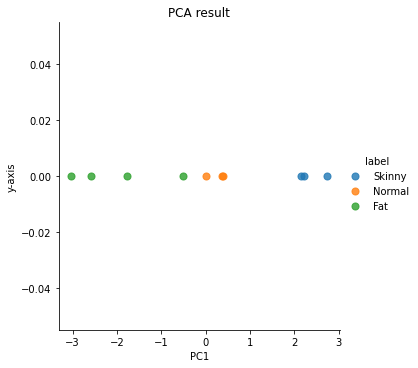

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.lmplot('PC1', 'y-axis', data = result, fit_reg = False, scatter_kws = {'s':50}, hue = 'label')
plt.title("PCA result")

### 사이킷런을 활용한 주성분 분석 간단 구현
- 사이킷런 라이브러리 사용하면 간단하게 주성분 분석 구현 가능

In [44]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=1) # 1차원으로 바꿈
sklearn_pca_x = pca.fit_transform(x_std) # 표준화는 해야됨

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


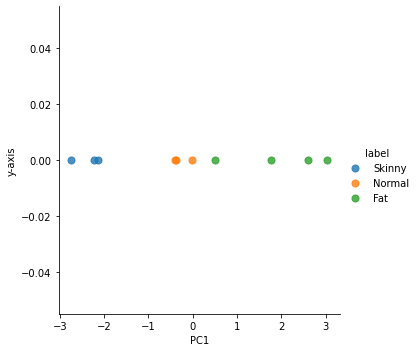

In [24]:
# 시각화
sklearn_result = pd.DataFrame(sklearn_pca_x, columns = ['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y
sns.lmplot('PC1','y-axis', data = sklearn_result, fit_reg = False, scatter_kws = {'s':50}, hue = 'label')